# QUESTION 2 : QUELLES SONT LES CARACTERISTIQUES DU PARTENAIRE QUI PEUVENT RENDRE LE DECIDEUR PLUS ENCLIN A SOUHAITER UN DEUXIEME RENDEZ-VOUS ?

In [2]:
# Importation des librairies

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from bioinfokit.analys import stat

pio.renderers.default = "notebook"

# 1. Importation & data management

In [3]:
# Importation du dataset 

data = pd.read_csv("C:/Users/LN/Documents/Formations/Jedha/2. Exploratory Data Analysis/Speed Dating Data.csv", encoding='cp1252')
data = pd.DataFrame(data)

init_shape = data.shape

## 1.1. Data management global 

1. Suppression des vagues 12, 16, 6, 18, 19, 20, 21 comme suggéré par les auteurs
- Une vague (12) a été supprimée car le nombre maximum de participants n'a pas été respecté
- Deux vagues (16, 6) ont été supprimées parce qu'au contraire, elles n'ont pas attiré suffisamment de participants 
- Quatre vagues (18, 19, 20, 21) ont été supprimées car elles impliquaient une variante expérimentale (amener son livre favori) et donc peuvent s'avérer différentes des autres vagues 

2. Suppression des vagues pour lesquelles les quotations ont drastiquement changé entre les vagues (non comparables) : 6 à 9

3. Suppresion des variables avec 40% ou + de données manquantes

4. Suppression des participants (Deciders / Partners) ayant un age >= 35 (outliers : recrutement prévu pour les étudiants - https://www.statista.com/statistics/240152/age-distribution-of-us-doctorate-recipients/)

In [4]:
# Suppression des vagues ciblées par les auteurs

data = data[~ data.wave.isin([12, 16, 6, 18, 19, 20, 21])]

# Suppression des vagues pour lesquelles les quotations ont drastiquement changé entre les vagues 

data = data[~ data.wave.isin([6, 7, 8, 9])]

# Suppression des colonnes avec 40% ou + de NA

Col_na = data.isna().mean()
#print("{} variables présentent 40% ou plus de données manquantes et seront ignorées : {}".format(len(Col_na[Col_na >= .4].index), list(Col_na[Col_na >= .4].index)))
print("{} variables présentent 40% ou plus de données manquantes et seront ignorées".format(len(Col_na[Col_na >= .4].index)))
print("")
data = data.loc[:, data.isna().mean() < .4]

# Suppression des observations relatives à des iid ou pid age > 35

data = data.drop(data[data["age"] >= 35].index)
data = data.drop(data[data["age_o"] >= 35].index)

# Suppresion des duplicates (Pas de duplicated rows)

data = data.drop_duplicates()

# Bilan 

final_shape = data.shape
print("Au depart, la base de données contenait {} lignes / colonnes pour contenir in fine {} lignes / colonnes".format(init_shape, final_shape))
print("")

83 variables présentent 40% ou plus de données manquantes et seront ignorées

Au depart, la base de données contenait (8378, 195) lignes / colonnes pour contenir in fine (4592, 112) lignes / colonnes



## 1.2. Formatage des données nécessaire au traitement de la question 

La variable d'intérêt ici est : Decision (dec) par le décideur (et non la décision du partenaire lui meme)

Les caractéristiques à baseline du partenaire présentes dans le dataset sont : 
- Variables Socio Démographiques : age_o, race_o
- Ce qu'il recherche chez l'autre : pf_o_att (partner’s stated preference at Time 1 for all 6 attributes)
- Comment il a été percu par les décideurs rencontrés : attr sinc intel fun amb shar

Comme tous les participants n'ont pas eu le même nombre de dates et que la tendance à susciter un second rendez-vous peut être différente de personne en personne indépendemment des variables investiguées ici (non independance des données), nous allons transformer le dataset de sorte à ne garder qu'une ligne par partenaire (aggregation sut la variable pid)
La variable d'interet DEC sera donc la proportion de dates pour lesquels le partenaire a suscité la volonté d'un deuxième rendez-vous chez le décideur. 

In [5]:
partner_caract_quant = ['age_o', 
                        'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 
                        'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
partner_caract_qual = ['race_o']

dec_agg_pid = data.groupby(['pid']).agg({'dec': 'mean', 
                                         'age_o' : lambda x: list(pd.Series.unique(x))[0], 
                                         'gender' : lambda x: list(pd.Series.unique(x))[0], 
                                         'attr' : 'mean',
                                         'sinc' : 'mean',
                                         'intel' : 'mean',
                                         'fun' : 'mean',
                                         'amb' : 'mean',
                                         'shar' : 'mean',
                                         'pf_o_att' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_sin' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_int' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_fun' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_amb' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_sha' : lambda x: list(pd.Series.unique(x))[0],
                                         'race_o' : lambda x: list(pd.Series.unique(x))[0]})

**Tips** : La librairie pandas_profiling propose une fonction pour générer automatiquement un Report - une description basique de la base de données. 

In [ ]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(dec_agg_pid, title='Speed Dating Report', explorative=True)
#report.to_file("report_partner.html")

# 2. Description de la variable d'intérêt Decision

Decision moyenne du décideur : Mean = 0.43 ; SD = 0.23



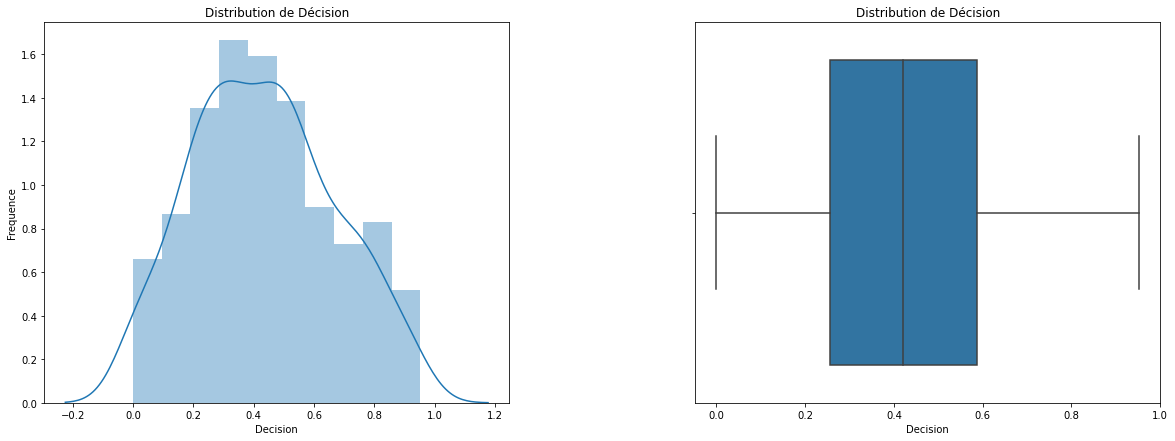

In [6]:
print("Decision moyenne du décideur : Mean = {} ; SD = {}".format(round(np.mean(dec_agg_pid.dec),2), round(np.std(dec_agg_pid.dec),2)))
print("")

fig = plt.figure(figsize=(20, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
sns.distplot(dec_agg_pid["dec"]).set(title='Distribution de Décision', xlabel='Decision', ylabel='Frequence')
ax = fig.add_subplot(1, 2, 2)
sns.boxplot(dec_agg_pid["dec"]).set(title='Distribution de Décision', xlabel='Decision')
plt.show()

Les partenaires font l'objet d'une décision positive de la part du décideur sur en moyenne 43% de leurs dates. 

# 3. Description de l'échantillon de partenaires 

In [7]:
df = dec_agg_pid[partner_caract_quant]

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().transpose()

count  mean   std   min   25%   50%   75%    max
age_o    297.00 25.79  3.38 18.00 23.00 26.00 28.00  34.00
pf_o_att 297.00 24.85 14.68  0.00 15.00 20.00 30.00 100.00
pf_o_sin 297.00 16.84  7.90  0.00 10.00 18.00 20.00  60.00
pf_o_int 297.00 20.35  7.93  0.00 16.00 20.00 25.00  50.00
pf_o_fun 296.00 17.58  7.26  0.00 11.78 20.00 20.00  50.00
pf_o_amb 295.00  9.89  6.57  0.00  5.00 10.00 15.00  53.00
pf_o_sha 295.00 10.85  6.74  0.00  5.00 10.00 15.00  30.00
attr     303.00  6.22  1.18  2.80  5.42  6.31  7.08   8.50
sinc     303.00  7.21  0.68  4.47  6.81  7.25  7.67   8.80
intel    303.00  7.38  0.61  4.80  6.95  7.43  7.81   8.80
fun      303.00  6.42  1.05  2.62  5.76  6.59  7.19   8.50
amb      303.00  6.81  0.78  4.00  6.29  6.75  7.33   8.60
shar     303.00  5.50  1.00  1.38  4.87  5.53  6.13   7.70

De manière parallèle à ce qui a été constaté pour les décideurs (même panel), l'attractivité, l'intelligence et l'humour semblent etre les qualités les plus fréquemment recherchées par les partenaires. L'ambition et le partage de centres d'intérêt semblent faire partie des éléments les moins déterminants. 
Globalement, les partenaires ont été positivement évalués sur toutes les dimensions, l'ambition et le partage de centre d'intérêt étant là encore les attributs les moins évalués comme détenus par les partenaires. 

In [8]:
labels = ['Age', 'Attentes du partenaire : Attractivité', 'Attentes du partenaire : Sincerité', 'Attentes du partenaire : Intelligence', 'Attentes du partenaire : Amusant', 
          'Attentes du partenaire : Ambition', 'Attentes du partenaire : Partage de centres d intérêt', 
                        'Perception par le décideur : Attractivité', 'Perception par le décideur : Sincerité', 'Perception par le décideur : Intelligence', 'Perception par le décideur : Amusant', 
                        'Perception par le décideur : Ambition', 'Perception par le décideur : Partage de centres d intérêt']
cols = df.columns

fig = go.Figure(go.Histogram(x = dec_agg_pid['age_o']))


my_buttons = [dict(method = "restyle",
                   args = [{'x': [ df[c]], 'name' : c} ],
                   label = labels[k]) for k, c in enumerate(cols)]

fig.update_layout(width=1000, height=600,
                 updatemenus=[dict(active=0,
                                   x= 1, y=1, 
                                   xanchor='left', 
                                   yanchor='top',
                                   buttons=my_buttons)
                              ]) 

Après examen des variables : 
- Age : Mean = 25.8 [18-34]
- Pour les caracteristiques recherchées chez autrui : 
    - Attractivité (Med = 20), Intelligence (Med = 20), Fun (Med = 20)
    - Sincerité (Med = 18)
    - Ambition (Med = 10), Partage de centres d'intéret (Med = 10)
- Perception par autrui : 
    - Sincerité (Med = 7.2), Fun (Med = 6.6), Intelligence (Med = 7.4), Ambition (Med = 6.7)
    - Attractivité (Med = 6.3)
    - Partage de centres d'intérêt (Med = 5.5)

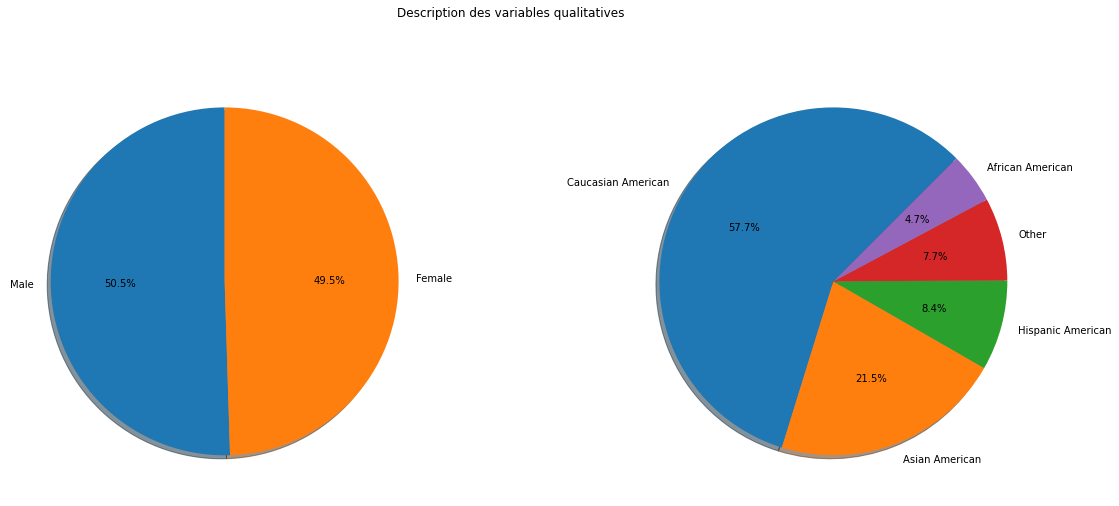

In [9]:
dec_agg_pid['gender'] = dec_agg_pid['gender'].replace([0,1],['Male', 'Female'])

dec_agg_pid['race_o'] = dec_agg_pid['race_o'].replace([1,2,3,4,5,6],['African American', 'Caucasian American', 'Hispanic American', 'Asian American', 'Native American', 'Other'])

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle('Description des variables qualitatives')

axes[0].pie(dec_agg_pid['gender'].value_counts(), labels=dec_agg_pid['gender'].value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1].pie(dec_agg_pid['race_o'].value_counts(), labels=dec_agg_pid['race_o'].value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=45)
plt.show()           

L'échantillon est équilibré en termes de genre, mais en termes d'ethnies, on constate une sur-représentation des Caucasiens, suivis par les Asiatiques. 

# 4. Relations entre la décision et les caracteristiques du partenaire

## 4.1. Relations bivariées

### 4.1.1. Variables quantitatives

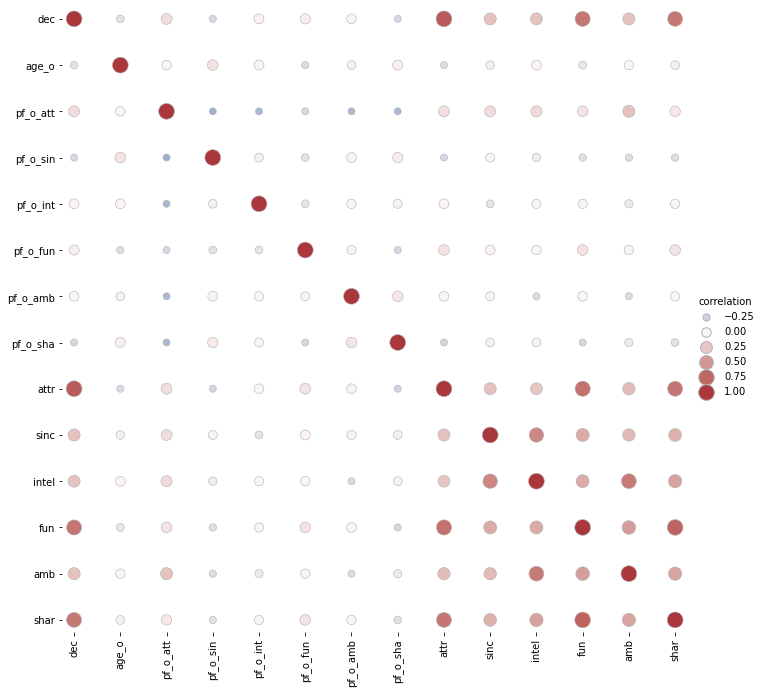

In [10]:
# Compute a correlation matrix and convert to long-form
corr_mat = dec_agg_pid[['dec'] + partner_caract_quant].corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
    

La matrice de correlations fait apparaitre des correlations plus importantes entre les qualités jugées par les décideurs et leur décision de vouloir un second rdv. De plus, les évaluations par les décideurs sur les différentes dimensions montrent des corrélations positives (contagion).

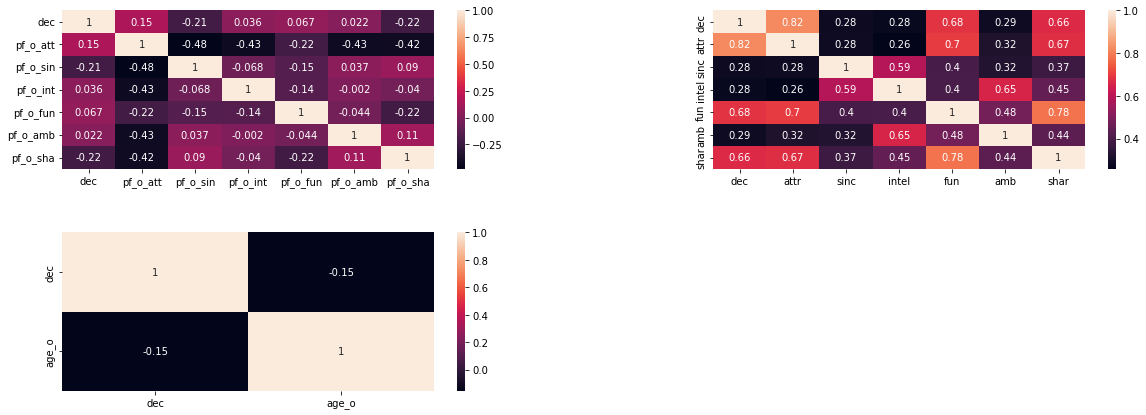

In [11]:
# Matrices de correlation 

corr1 = dec_agg_pid[['dec'] + [partner_caract_quant[0]]].corr() 
corr2 = dec_agg_pid[['dec'] + partner_caract_quant[1:7]].corr() 
corr3 = dec_agg_pid[['dec'] + partner_caract_quant[7:]].corr() 

# Heatmaps 

fig = plt.figure(figsize=(20, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.heatmap(corr2, annot=True, ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.heatmap(corr3, annot=True, ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.heatmap(corr1, annot=True, ax=ax)
plt.show()

L'examen des correlations (> .2) nous amène à considérer les relations entre Decision et 
- pf_o_sin
- pf_o_sha
- attr
- sinc
- intel
- fun
- amb
- shar

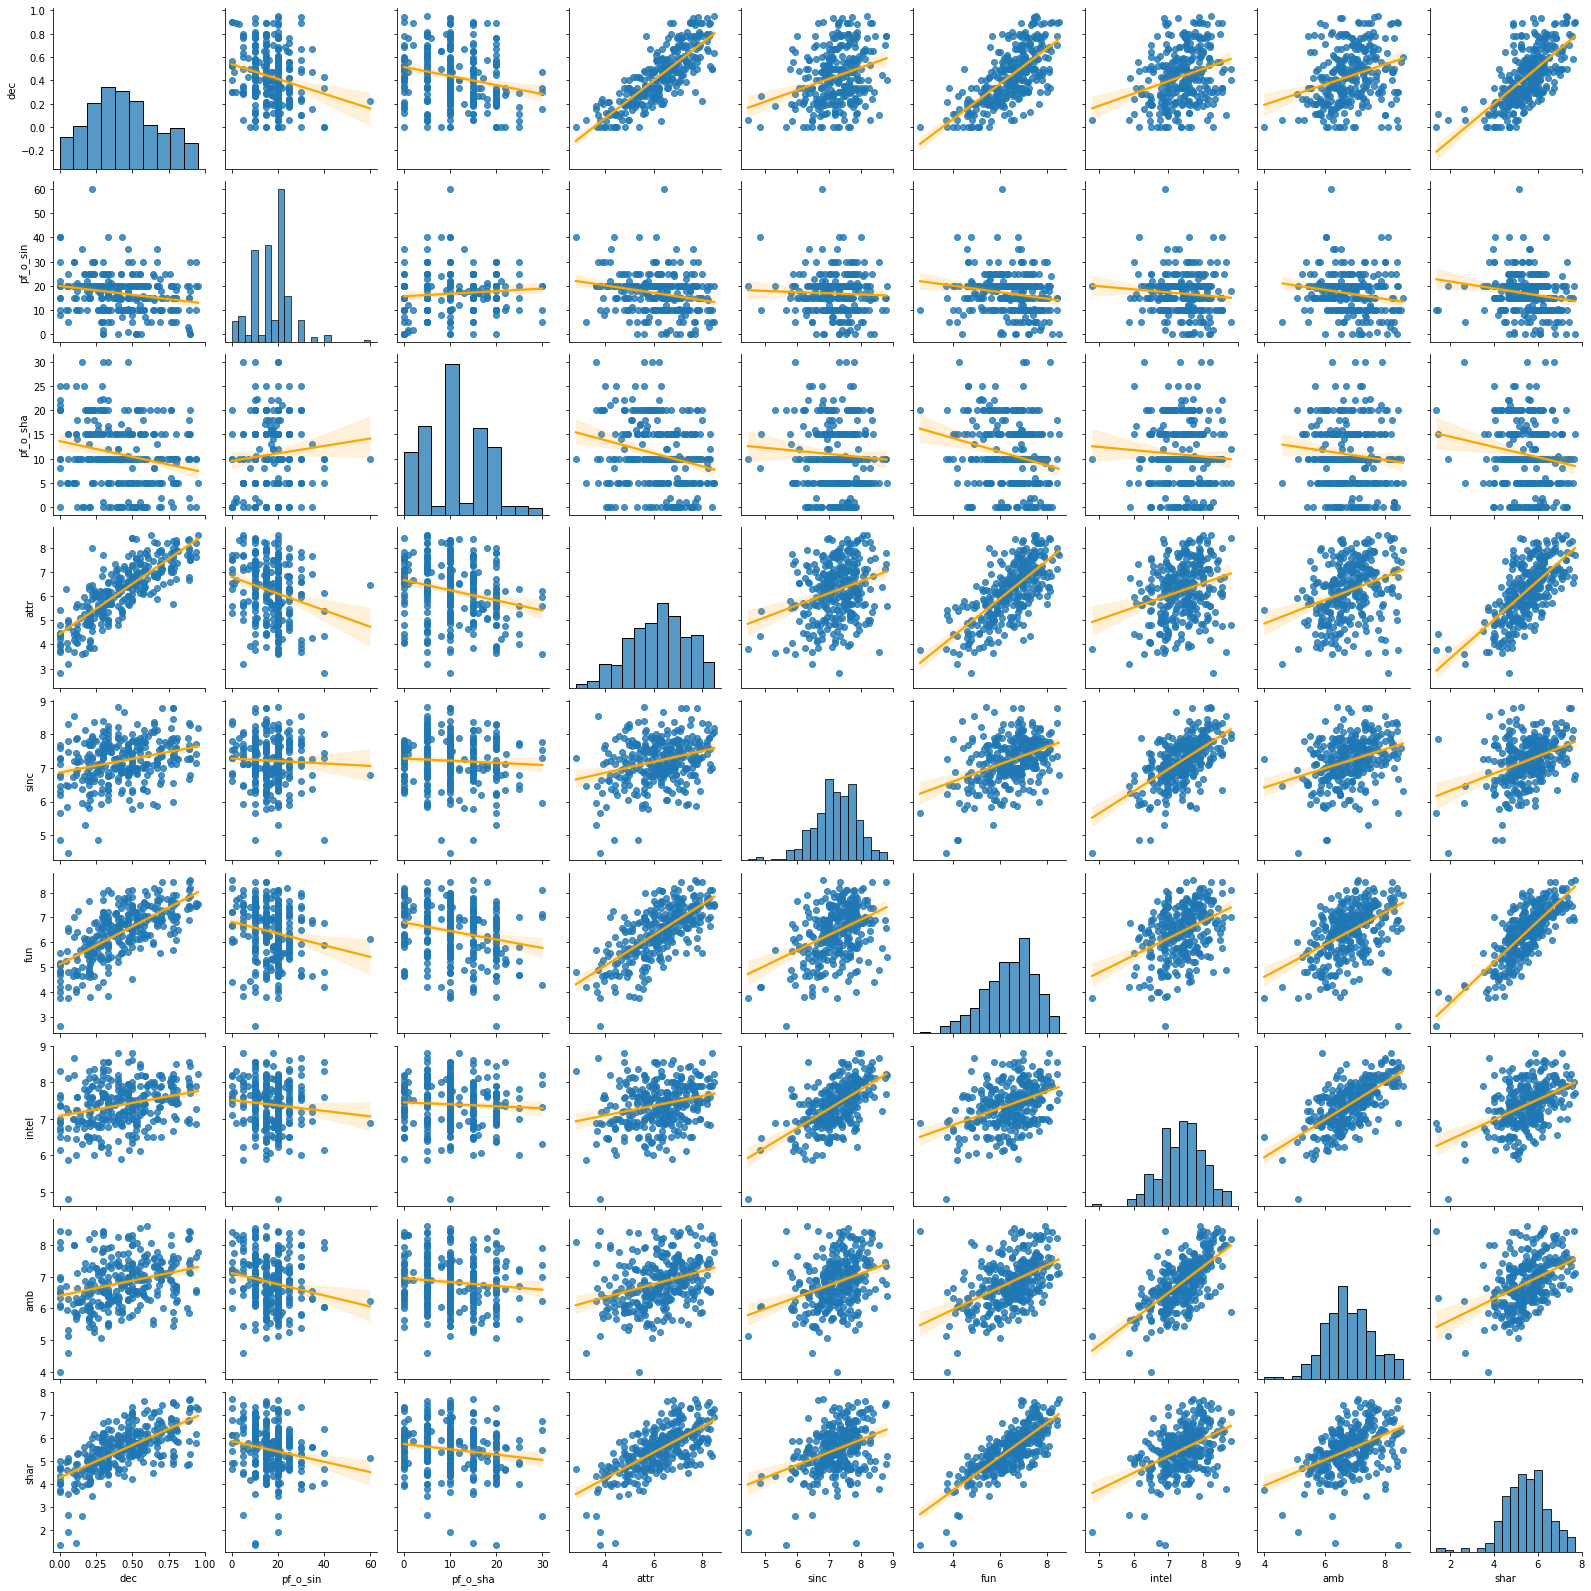

In [12]:
Variables = ['dec', 'pf_o_sin', 'pf_o_sha', 'attr', 'sinc', 'fun', 'intel', 'amb', 'shar']

sns.pairplot(dec_agg_pid[Variables], kind = 'reg', plot_kws={'line_kws':{'color':'orange'}})
plt.show()

Les correlations entre la décision et les caractéristiques recherchées par le partenaire indiquent : 
- Sincerité (-0.21) : Plus le partenaire recherche un décideur sincère, moins il a de chances de susciter un second rdv
- Partage de centres d'intérêt (-0.22) : Plus le partenaire recherche un décideur qui partage avec lui des centres d'intérêt, moins il a de chances de susciter un second rdv

En revanche, comme attendu, plus un partenaire est en moyenne évalué comme
- Attrayant (0.82)
- Sincère (0.28)
- Drole (0.68)
- Intelligent (0.28)
- Ambitieux (0.29)
- Partageant des centres d'intérêt avec le décideur (0.66)
plus il est susceptible de se voir proposer un second rdv. L'attractivité est l'élément fondamental. 

### 4.1.2. Variables qualitatives

In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

res = stat()
formula = 'dec ~ C(' + 'race_o' + ')'
res.anova_stat(df=dec_agg_pid, res_var = 'dec', anova_model = formula)
res.anova_summary

df  sum_sq  mean_sq     F  PR(>F)
C(race_o)   4.000   1.091    0.273 5.302   0.000
Residual  293.000  15.074    0.051   NaN     NaN

In [16]:
res = stat()
formula = 'dec ~ C(' + 'gender' + ')'
res.anova_stat(df=dec_agg_pid, res_var = 'dec', anova_model = formula)
res.anova_summary

df  sum_sq  mean_sq     F  PR(>F)
C(gender)   1.000   0.500    0.500 9.359   0.002
Residual  301.000  16.086    0.053   NaN     NaN

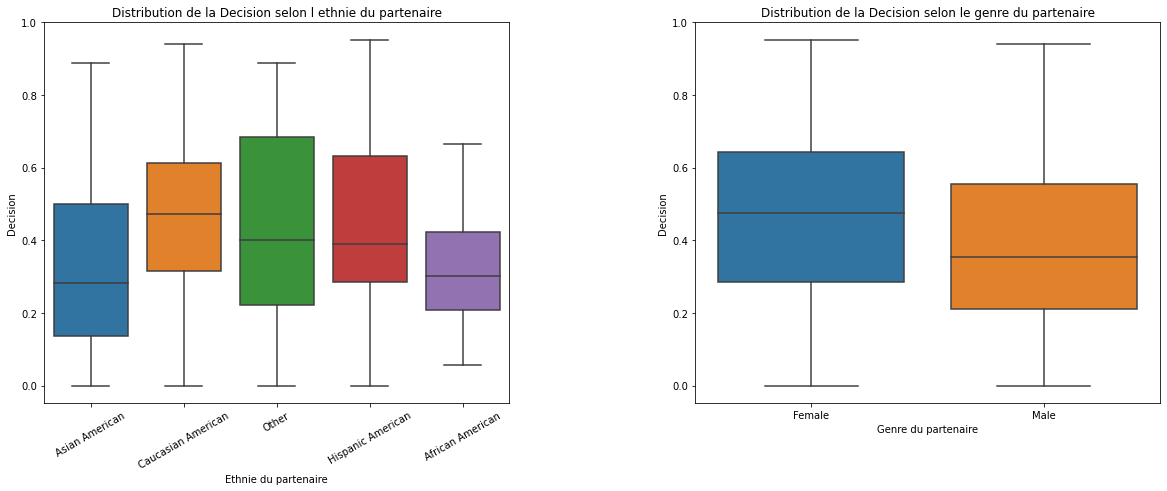

In [17]:

fig = plt.figure(figsize=(20, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
g = sns.boxplot(x='race_o', y='dec', data=dec_agg_pid)
g.set(title='Distribution de la Decision selon l ethnie du partenaire', xlabel='Ethnie du partenaire', ylabel='Decision');
g.set_xticklabels(g.get_xticklabels(),rotation=30)

ax = fig.add_subplot(1, 2, 2)
h = sns.boxplot(x='gender', y='dec', data=dec_agg_pid)
h.set(title='Distribution de la Decision selon le genre du partenaire', xlabel='Genre du partenaire', ylabel='Decision');

Le genre du partenaire a un effet significatif sur la décision des décideurs : Les femmes ont davantage tendance que les hommes à susciter l'envie d'un deuxième rdv. 

L'ethnie du partenaire a un effet significatif sur la décision des décideurs : Les Americains Asiatiques et Africains semblent avoir moins tendance que les autres et notamment que les Américains caucasiens, à susciter l'envie d'un second RDV. 

## 4.2. Relations multivariées

### 4.2.1. Clustering

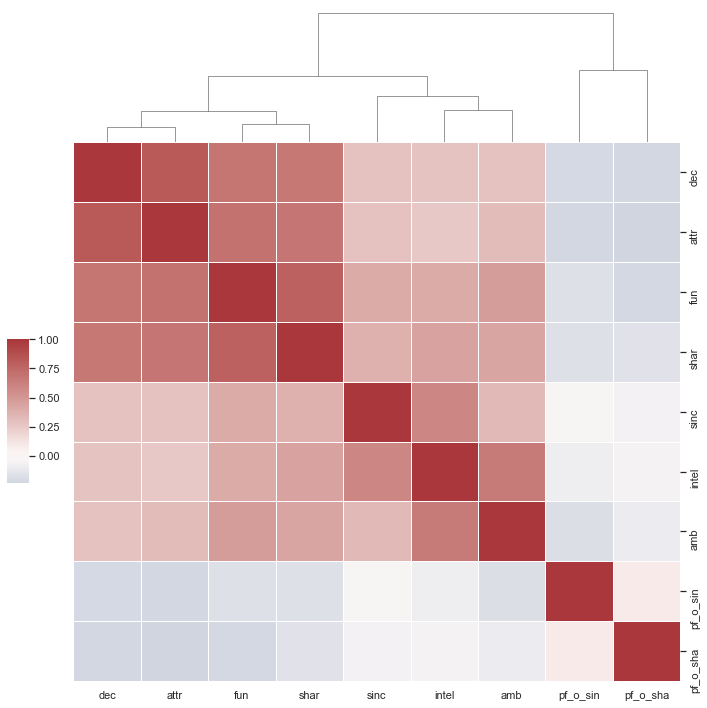

In [18]:
sns.set_theme()

df = dec_agg_pid

# Select a subset
df = df.loc[:, Variables]

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(10, 10))

g.ax_row_dendrogram.remove()

Il ressort que la décision est principalement reliée à l'attractivité du partenaire, son humour et le partage de centres d'intérêt. Viennent ensuite les autres caracteristiques du partenaires (sincerité, intelligence, ambition), puis enfin les critères importants pour le partenaire lui même (i.e. le fait que le partenaire recherche quelqu'un de sincère et avec qui il partage des centres d'interet).

Nous allons nous concentrer sur les 3 principales variables influencant la probilité de décision positive en faveur du partenaire. 

Il serait intéressant pour prendre en compte les différentes qualités des partenaires de faire une PCA afin de reduire les dimensions voir de créer des profils de partenaires (clustering) pour déterminer les profils les + à mêmes de susciter un 2nd RDV. 

### 4.2.2. Interaction Attractivité * Caractère amusant

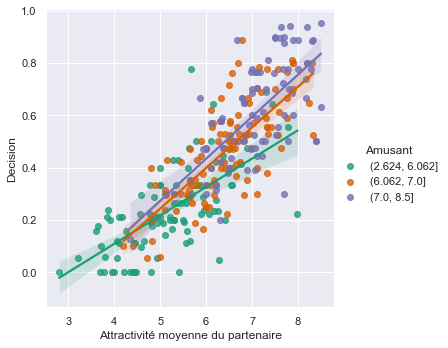

In [19]:
dec_agg_pid['Amusant'] = pd.qcut(dec_agg_pid["fun"], 3)

sns.lmplot(
        data = dec_agg_pid, 
        hue = 'Amusant',
        x = 'attr', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Attractivité moyenne du partenaire", ylabel = 'Decision');

Les personnes les moins "amusantes" sont de manière générale percues comme les - attractives et sont moins génératrices d'une décision favorable. 

En termes d'interaction, on constate l'effet de l'attractivité du partenaire sur la décision moyenne des décideurs est plus faible pour les partenaires jugés moins amusantes.  

### 4.2.3. Interaction Attractivité * Partage de centres d'intérêt

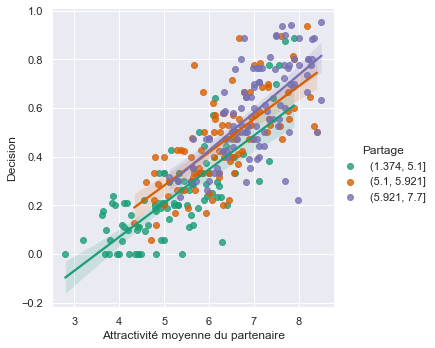

In [20]:
dec_agg_pid['Partage'] = pd.qcut(dec_agg_pid["shar"], 3)

sns.lmplot(
        data = dec_agg_pid, 
        hue = 'Partage',
        x = 'attr', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Attractivité moyenne du partenaire", ylabel = 'Decision');

Les personnes percues comme partageant le moins de centres d'interêt sont de manière générale percues comme les - attractives et sont moins génératrices d'une décision favorable. 

Cependant, l'effet de l'attractivité ne varie pas quelque soit le degré de partage de centres d'intérêt (pas d'interaction).  

### 4.2.4. Interaction Caractère amusant * Partage de centres d'intérêt

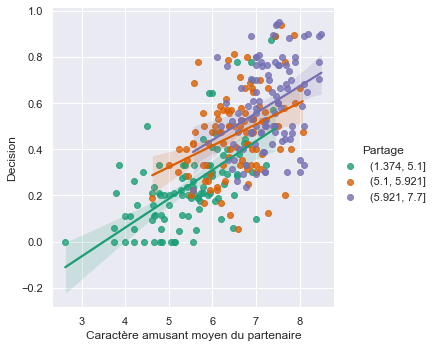

In [21]:
sns.lmplot(
        data = dec_agg_pid, 
        hue = 'Partage',
        x = 'fun', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Caractère amusant moyen du partenaire", ylabel = 'Decision');

Les personnes percues comme partageant le moins de centres d'interêt sont de manière générale percues comme les - amusantes et sont moins génératrices d'une décision favorable. 

Cependant, l'effet du caractère amusant ne varie pas beaucoup quelque soit le degré de partage de centres d'intérêt (pas d'interaction).  

### 4.2.5. Interaction Attractivité * Genre

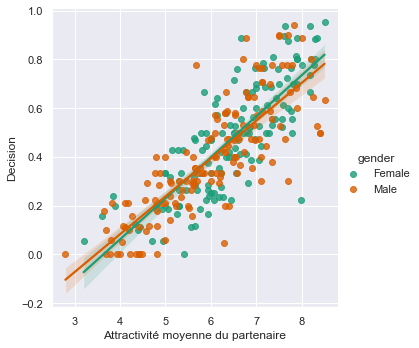

In [22]:
sns.lmplot(
        data = dec_agg_pid, 
        hue = 'gender',
        x = 'attr', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Attractivité moyenne du partenaire", ylabel = 'Decision');


L'effet de l'attractivité du partenaire sur la décision du décideur ne change pas selon que le partenaire soit un homme ou une femme. 

### 4.2.6. Interaction Attractivité * Ethnie

ATTRACTIVITE * ETHNIE

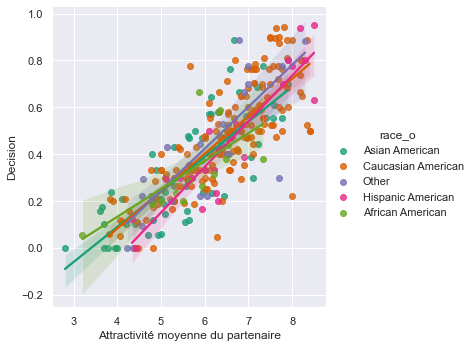

In [23]:
sns.lmplot(
        data = dec_agg_pid, 
        hue = 'race_o',
        x = 'attr', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Attractivité moyenne du partenaire", ylabel = 'Decision');

L'effet de l'attractivité du partenaire sur la décision du décideur ne change pas (ou peu) selon que l'éthnie du partenaire. Peut être un effet un peu moins marqué de l'effet de l'attractivité sur la décision quand le partenaire est d'origine Africaine.  

Les personnes percues comme partageant le moins de centres d'interêt sont de manière générale percues comme les - fun et sont moins génératrices d'une décision favorable. Cependant, l'effet de l'humour percu ne varie pas quelque soit le degré de SHARING.  

### 4.2.7. Interaction Caractère amusant * Genre

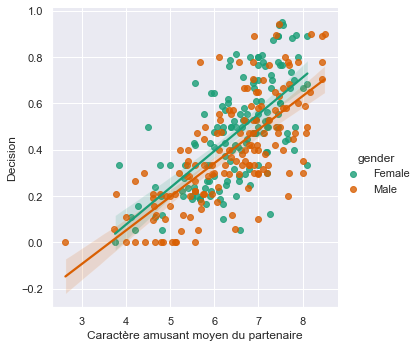

In [25]:
sns.lmplot(
        data = dec_agg_pid, 
        hue = 'gender',
        x = 'fun', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Caractère amusant moyen du partenaire", ylabel = 'Decision');

L'effet de l'humour du partenaire sur la décision du décideur ne change pas selon que le partenaire soit un homme ou une femme. 

### 4.2.8. Interaction Caractère amusant * Ethnie

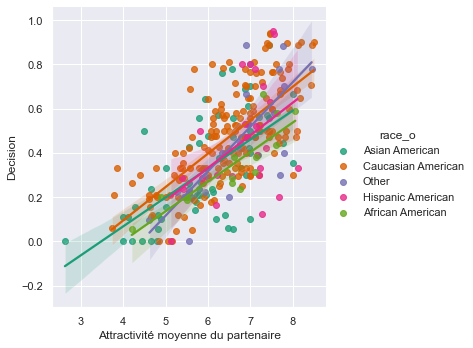

In [26]:
sns.lmplot(
        data = dec_agg_pid, 
        hue = 'race_o',
        x = 'fun', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Attractivité moyenne du partenaire", ylabel = 'Decision');

L'effet de l'humour du partenaire sur la décision du décideur ne change pas (ou peu) selon que l'éthnie du partenaire. Peut être un effet de l'attractivité plus marqué pour les origines "Autres". 

### 4.2.9. Interaction Partage de centres d'intérêt * Genre

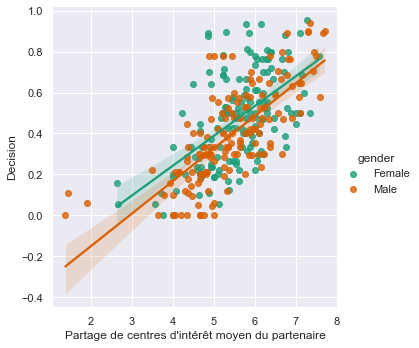

In [28]:
sns.lmplot(
        data = dec_agg_pid, 
        hue = 'gender',
        x = 'shar', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Partage de centres d'intérêt moyen du partenaire", ylabel = 'Decision');

L'effet du partage de centres d'interet avec le partenaire sur la décision du décideur ne change pas selon que le partenaire soit un homme ou une femme. 

### 4.2.10. Interaction Partage de centres d'intérêt * Ethnie

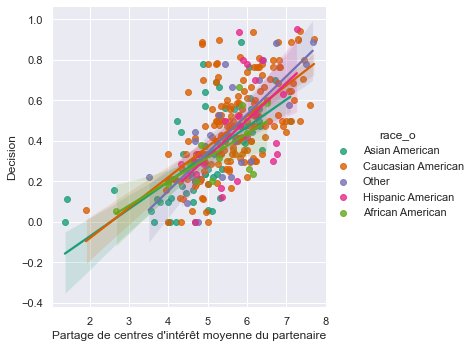

In [29]:
sns.lmplot(
        data = dec_agg_pid, 
        hue = 'race_o',
        x = 'shar', 
        y = 'dec',
        palette='Dark2').set(xlabel = "Partage de centres d'intérêt moyenne du partenaire", ylabel = 'Decision');

L'effet du partage de centres d'interet avec le partenaire sur la décision du décideur ne change pas selon que l'éthnie du partenaire. 

# 5. Conclusions

L'évaluation du partenaire sur différentes dimensions influencent positivement le fait qu'on souhaite le revoir à la suite du premier rendez-vous. 
Plus un partenaire est perçu comme attrayant, drôle, partageant des centres d'intérêts, ambiteux, sincère et intelligent, plus il est susceptible de se voir proposer un second rdv. On notera que l'attractivité est l'élément fondamental alors que la sincérité et l'intelligence sont des caractéristiques plus annexes dans le déclenchement d'une envie d'aller plus loin. 

Contrairement à ce que l'on pourrait attendre, plus le partenaire recherche un décideur sincère, et plus il recherche quelqu'un qui partage avec lui des centres d'intérêt, moins il a de chances de susciter un second rendez-vous. 

Enfin, les femmes sont plus à même de déclencher l'envie d'un second rendez-vous, tout comme les personnes caucasiennes. Cela est peut être en lien avec la sur-représentation des caucasiens dans notre échantillon. 

Concernant les interactions entre les variables, les modèles statistiques seraient ici plus à même de nous permettre de les investiguer puisque les effets observés sont souvent portés par des corrélations fortes entre les covariables analysées (les personnes les moins bien évaluées sur une dimension, sont aussi celles les moins bien évaluées sur une deuxième dimension et sont enfin celles qui suscitent le moins de deuxieme rendez-vous). 